In [1]:
# Importing libararies for neural network

import tensorflow as tf
from tensorflow import keras

# Importing libararies for data manipulation

import pandas as pd
import numpy as np

# Importing libraries for data visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

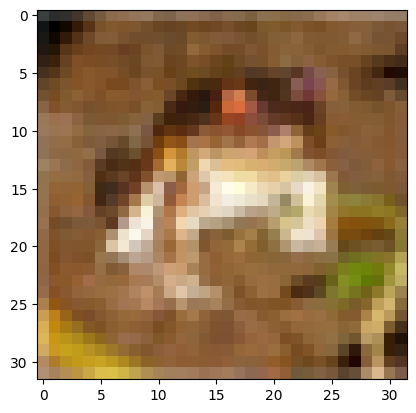

In [4]:
plt.imshow(x_train[0])

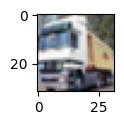

In [5]:
plt.figure(figsize=(5,1))
plt.imshow(x_train[1])

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [10]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')
y_test_categorical[:4]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
x_test_scaled = x_test/255

In [14]:
x_train_scaled = x_train/255

In [15]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=x_train[0].shape),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

ann.compile(
    optimizer = 'SGD',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

ann.fit(x_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 86s 54ms/step - loss: 0.3043 - accuracy: 0.2934
Epoch 2/5
1563/1563 [==============================] - 85s 55ms/step - loss: 0.2823 - accuracy: 0.3585
Epoch 3/5
1563/1563 [==============================] - 86s 55ms/step - loss: 0.2741 - accuracy: 0.3782
Epoch 4/5
1563/1563 [==============================] - 86s 55ms/step - loss: 0.2683 - accuracy: 0.3956
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: 0.2638 - accuracy: 0.4048


In [22]:
from sklearn.metrics import classification_report

y_predicted = ann.predict(x_test_scaled)
y_predicted = [np.argmax(p) for p in y_predicted]

print(classification_report(y_test, y_predicted))

313/313 [==============================] - 5s 15ms/step
              precision    recall  f1-score   support

           0       0.49      0.45      0.47      1000
           1       0.43      0.52      0.47      1000
           2       0.33      0.29      0.31      1000
           3       0.29      0.34      0.31      1000
           4       0.44      0.27      0.33      1000
           5       0.34      0.38      0.35      1000
           6       0.41      0.50      0.45      1000
           7       0.55      0.34      0.42      1000
           8       0.43      0.61      0.51      1000
           9       0.49      0.41      0.44      1000

    accuracy                           0.41     10000
   macro avg       0.42      0.41      0.41     10000
weighted avg       0.42      0.41      0.41     10000



In [26]:
ann = keras.Sequential([
    #cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    #cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),

    #Dense
    keras.layers.Flatten(input_shape=x_train[0].shape),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann.compile(
    optimizer = 'SGD',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

ann.fit(x_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 0.3322 - accuracy: 0.1800
Epoch 2/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.3086 - accuracy: 0.2516
Epoch 3/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.2944 - accuracy: 0.2942
Epoch 4/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.2874 - accuracy: 0.3135
Epoch 5/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.2815 - accuracy: 0.3338
Epoch 6/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.2746 - accuracy: 0.3548
Epoch 7/10
1563/1563 [==============================] - 87s 55ms/step - loss: 0.2671 - accuracy: 0.3774
Epoch 8/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.2592 - accuracy: 0.4006
Epoch 9/10
1563/1563 [==============================] - 87s 56ms/step - loss: 0.2516 - accuracy: 0.4215
Epoch 10/10
1563/1563 [==============================] - 87s 56m

In [28]:
from sklearn.metrics import classification_report

y_predicted = ann.predict(x_test_scaled)
y_predicted = [np.argmax(p) for p in y_predicted]

print(classification_report(y_test, y_predicted))

313/313 [==============================] - 5s 16ms/step
              precision    recall  f1-score   support

           0       0.52      0.55      0.53      1000
           1       0.63      0.42      0.51      1000
           2       0.31      0.41      0.35      1000
           3       0.35      0.14      0.20      1000
           4       0.57      0.10      0.17      1000
           5       0.40      0.47      0.43      1000
           6       0.36      0.74      0.49      1000
           7       0.54      0.47      0.50      1000
           8       0.56      0.50      0.53      1000
           9       0.44      0.59      0.50      1000

    accuracy                           0.44     10000
   macro avg       0.47      0.44      0.42     10000
weighted avg       0.47      0.44      0.42     10000



In [27]:
ann.evaluate(x_test_scaled, y_test_categorical)

313/313 [==============================] - 6s 16ms/step - loss: 0.2426 - accuracy: 0.4401


[0.24255293607711792, 0.4401000142097473]

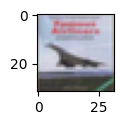

In [32]:
plt.figure(figsize=(5,1))
plt.imshow(x_test[3])
